In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pycaret.classification import *

In [2]:
train = pd.read_csv('train.csv', sep=',')
train

state  account_length      area_code international_plan voice_mail_plan  \
0       OH             107  area_code_415                 no             yes   
1       NJ             137  area_code_415                 no              no   
2       OH              84  area_code_408                yes              no   
3       OK              75  area_code_415                yes              no   
4       MA             121  area_code_510                 no             yes   
...    ...             ...            ...                ...             ...   
4245    MT              83  area_code_415                 no              no   
4246    WV              73  area_code_408                 no              no   
4247    NC              75  area_code_408                 no              no   
4248    HI              50  area_code_408                 no             yes   
4249    VT              86  area_code_415                 no             yes   

      number_vmail_messages  total_day_minutes  total_day_calls  \
0                        26              161.6              123   
1                         0              243.4              114   
2                         0              299.4               71   
3                         0              166.7              113   
4                        24              218.2               88   
...                     ...                ...              ...   
4245                      0              188.3               70   
4246                      0              177.9               89   
4247                      0              170.7              101   
4248                     40              235.7              127   
4249                     34              129.4              102   

      total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0                27.47              195.5              103             16.62   
1                41.38              121.2              110             10.30   
2                50.90               61.9               88              5.26   
3                28.34              148.3              122             12.61   
4                37.09              348.5              108             29.62   
...                ...                ...              ...               ...   
4245             32.01              243.8               88             20.72   
4246             30.24              131.2               82             11.15   
4247             29.02              193.1              126             16.41   
4248             40.07              223.0              126             18.96   
4249             22.00              267.1              104             22.70   

      total_night_minutes  total_night_calls  total_night_charge  \
0                   254.4                103               11.45   
1                   162.6                104                7.32   
2                   196.9                 89                8.86   
3                   186.9                121                8.41   
4                   212.6                118                9.57   
...                   ...                ...                 ...   
4245                213.7                 79                9.62   
4246                186.2                 89                8.38   
4247                129.1                104                5.81   
4248                297.5                116               13.39   
4249                154.8                100                6.97   

      total_intl_minutes  total_intl_calls  total_intl_charge  \
0                   13.7                 3               3.70   
1                   12.2                 5               3.29   
2                    6.6                 7               1.78   
3                   10.1                 3               2.73   
4                    7.5                 7               2.03   
...                  ...               ...                ...   
4245  

In [3]:
test = pd.read_csv('test.csv', sep=',')
test

id state  account_length      area_code international_plan  \
0      1    KS             128  area_code_415                 no   
1      2    AL             118  area_code_510                yes   
2      3    IA              62  area_code_415                 no   
3      4    VT              93  area_code_510                 no   
4      5    NE             174  area_code_415                 no   
..   ...   ...             ...            ...                ...   
745  746    GA             130  area_code_415                 no   
746  747    WA              73  area_code_408                 no   
747  748    WV             152  area_code_415                 no   
748  749    DC              61  area_code_415                 no   
749  750    DC             109  area_code_510                 no   

    voice_mail_plan  number_vmail_messages  total_day_minutes  \
0               yes                     25              265.1   
1                no                      0              223.4   
2                no                      0              120.7   
3                no                      0              190.7   
4                no                      0              124.3   
..              ...                    ...                ...   
745              no                      0              119.4   
746              no                      0              177.2   
747              no                      0              184.2   
748              no                      0              140.6   
749              no                      0              188.8   

     total_day_calls  total_day_charge  total_eve_minutes  total_eve_calls  \
0                110             45.07              197.4               99   
1                 98             37.98              220.6              101   
2                 70             20.52              307.2               76   
3                114             32.42              218.2              111   
4                 76             21.13              277.1              112   
..               ...               ...                ...              ...   
745               99             20.30              226.3               97   
746              118             30.12              270.5               84   
747               90             31.31              256.8               73   
748               89             23.90              172.8              128   
749               67             32.10              171.7               92   

     total_eve_charge  total_night_minutes  total_night_calls  \
0               16.78                244.7                 91   
1               18.75                203.9                118   
2               26.11                203.0                 99   
3               18.55                129.6                121   
4               23.55                250.7                115   
..                ...                  ...                ...   
745             19.24                202.7                111   
746             22.99                241.8                112   
747             21.83                213.6                113   
748             14.69                212.4                 97   
749             14.59                224.4                 89   

     total_night_charge  total_intl_minutes  total_intl_calls  \
0                 11.01                10.0                 3   
1                  9.18                 6.3                 6   
2                  9.14                13.1                 6   
3                  5.83                 8.1                 3   
4                 11.28                15.5                 5   
..                  ...                 ...               ...   
745                9.12                11.3                 7   
746               10.88                12.3                 2   
747                9.61                14.7                 2   
748                9.56                1

array([[<AxesSubplot:title={'center':'account_length'}>,
        <AxesSubplot:title={'center':'number_customer_service_calls'}>,
        <AxesSubplot:title={'center':'number_vmail_messages'}>,
        <AxesSubplot:title={'center':'total_day_calls'}>],
       [<AxesSubplot:title={'center':'total_day_charge'}>,
        <AxesSubplot:title={'center':'total_day_minutes'}>,
        <AxesSubplot:title={'center':'total_eve_calls'}>,
        <AxesSubplot:title={'center':'total_eve_charge'}>],
       [<AxesSubplot:title={'center':'total_eve_minutes'}>,
        <AxesSubplot:title={'center':'total_intl_calls'}>,
        <AxesSubplot:title={'center':'total_intl_charge'}>,
        <AxesSubplot:title={'center':'total_intl_minutes'}>],
       [<AxesSubplot:title={'center':'total_night_calls'}>,
        <AxesSubplot:title={'center':'total_night_charge'}>,
        <AxesSubplot:title={'center':'total_night_minutes'}>,
        <AxesSubplot:>]], dtype=object)

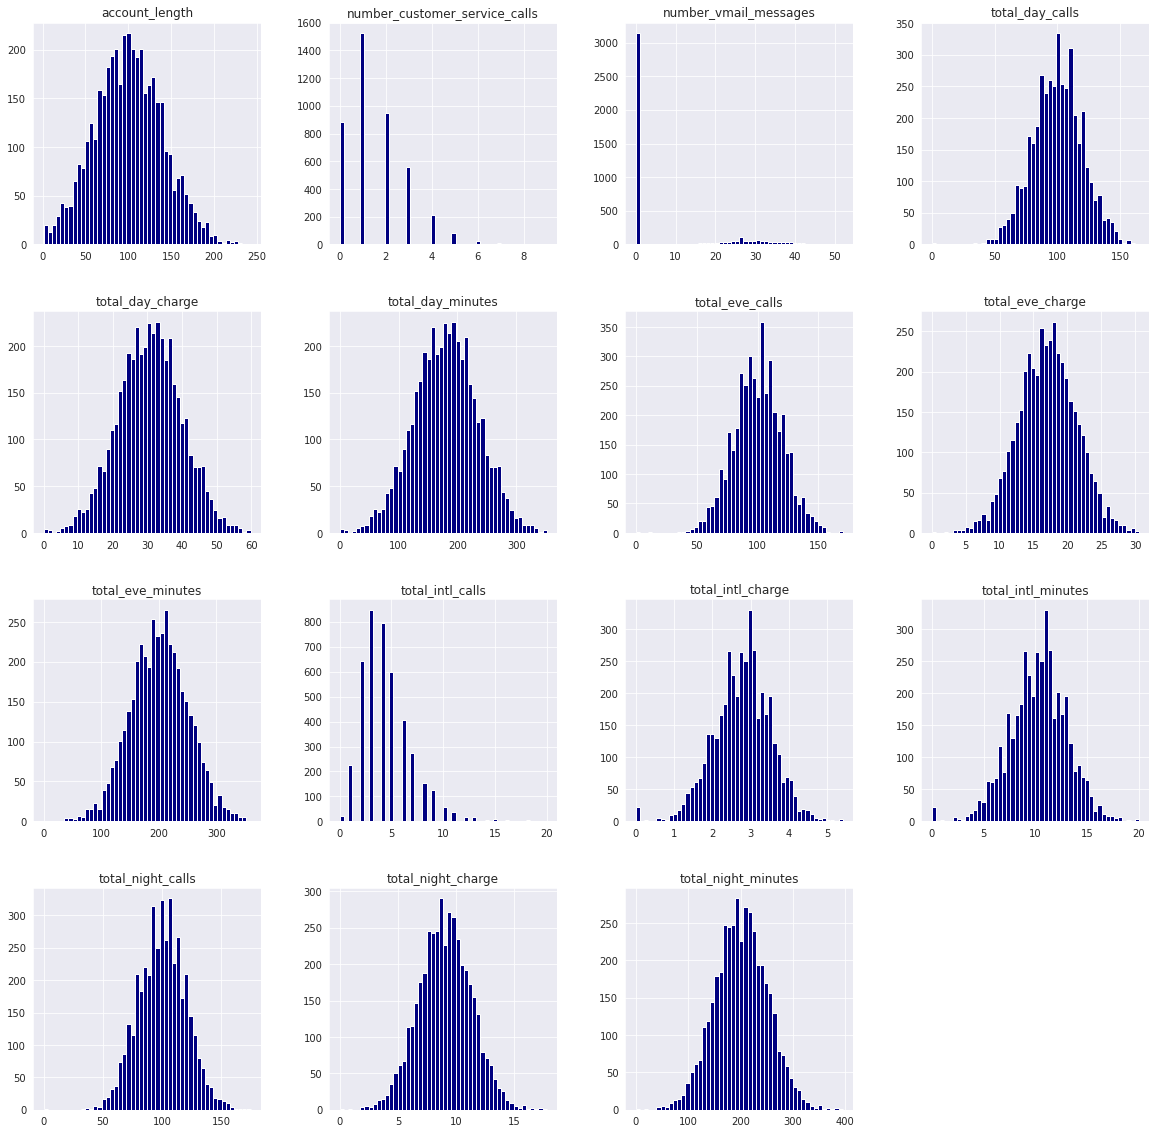

In [4]:
sns.set_style('dark')
train.hist(bins=50,figsize=(20,20),color='navy')

In [5]:
train.state = pd.Categorical(train.state).codes
train.area_code = pd.Categorical(train.area_code).codes
train.international_plan = pd.Categorical(train.international_plan).codes
train.voice_mail_plan = pd.Categorical(train.voice_mail_plan).codes
train.churn = pd.Categorical(train.churn).codes

test.state = pd.Categorical(test.state).codes
test.area_code = pd.Categorical(test.area_code).codes
test.international_plan = pd.Categorical(test.international_plan).codes
test.voice_mail_plan = pd.Categorical(test.voice_mail_plan).codes


In [7]:
del train['state']
del train['area_code']
del train['number_vmail_messages']

In [8]:
model = setup(train, target = 'churn', session_id=123)

In [9]:
best = compare_models()

In [10]:
model = create_model('xgboost')

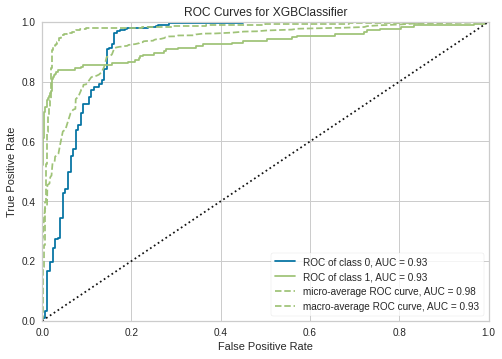

In [11]:
plot_model(model)

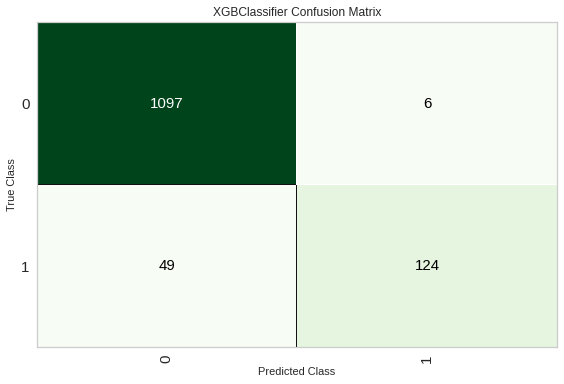

In [12]:
plot_model(model, plot='confusion_matrix')

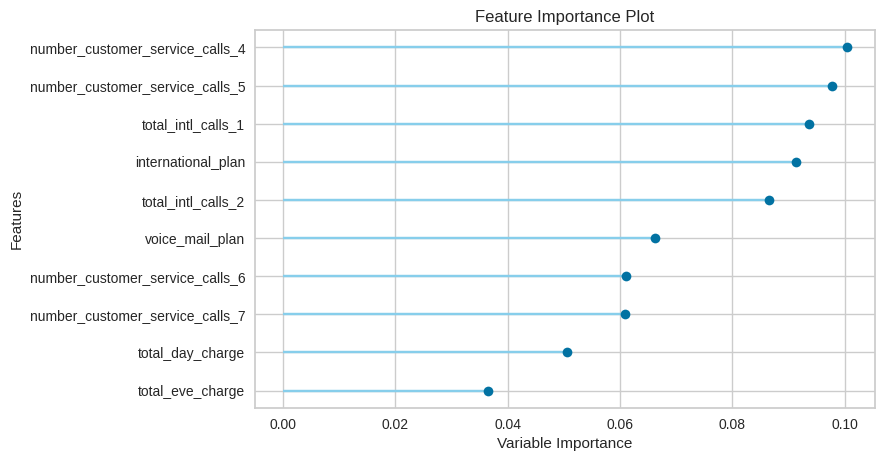

In [13]:
plot_model(model, plot='feature')

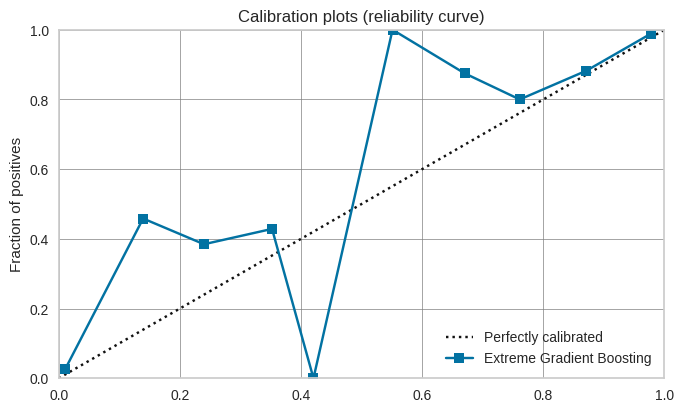

In [14]:
plot_model(model, plot='calibration')

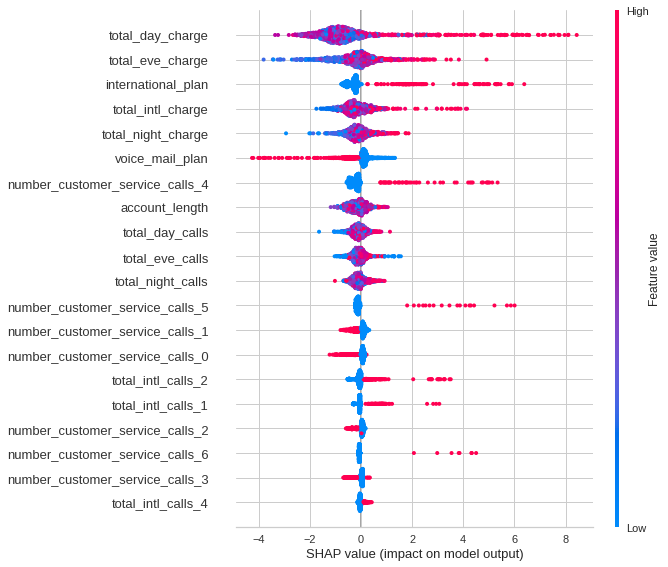

In [15]:
interpret_model(model)

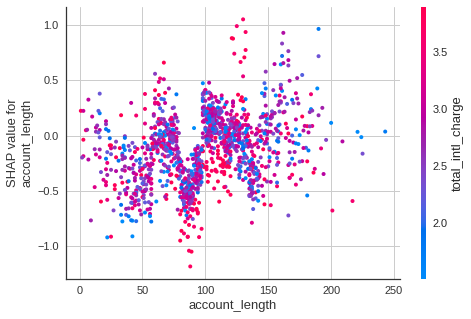

In [16]:
interpret_model(model, plot='correlation')

In [17]:
interpret_model(model, plot='reason')

In [18]:
interpret_model(model, plot = 'reason', observation = 10)

In [19]:
model_pred_holdout = predict_model(model)

In [20]:
del test['state']
del test['area_code']
del test['number_vmail_messages']

In [21]:
model_pred_new = predict_model(model, data = test) #new_data is pd dataframe

In [22]:
model_pred_new['Label'].value_counts()

0    661
1     89
Name: Label, dtype: int64

In [23]:
resul = model_pred_new

In [24]:
resul[['id', 'Label']]
resul['churn'] = resul['Label']
del resul['Label']
submission = resul[['id', 'churn']]

In [25]:
resul['churn']

0      0
1      0
2      1
3      0
4      0
      ..
745    0
746    0
747    0
748    0
749    0
Name: churn, Length: 750, dtype: int64

In [26]:
submission = np.where(resul.churn == 0,'no','yes')

In [27]:
submission

array(['no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no',
       'yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no',
       'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no',
       'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no',
       'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       'no', 'no', 'no', 'no', 'no', 'no',

In [28]:
resul['id']

0        1
1        2
2        3
3        4
4        5
      ... 
745    746
746    747
747    748
748    749
749    750
Name: id, Length: 750, dtype: int64

In [29]:
df = pd.DataFrame()
df['id'] = resul['id']
df['churn'] = submission

In [30]:
df

id churn
0      1    no
1      2    no
2      3   yes
3      4    no
4      5    no
..   ...   ...
745  746    no
746  747    no
747  748    no
748  749    no
749  750    no

[750 rows x 2 columns]

In [31]:
df.to_csv('mycsvfile5.csv',index=False)

In [32]:
a = pd.read_csv('mycsvfile5.csv')
a

id churn
0      1    no
1      2    no
2      3   yes
3      4    no
4      5    no
..   ...   ...
745  746    no
746  747    no
747  748    no
748  749    no
749  750    no

[750 rows x 2 columns]

Yeah!!!! Nossa predição no site do Kaggle teve uma pontuação de 0.96444.Simplesmente incrível. 